In [1]:
library(dplyr)
library(ggplot2)
library(tidyr)
library(readr)
library(forcats)
library(reshape2)
library(vcd)
library(purrr)

data <- read_csv("nsw.csv", show_col_types = FALSE)
categorical_columns <- c(
  "Gender", "Experience", "Industry", "FamilyStatus",
  "Location", "InterpersonalRelationships", "SocialIsolation",
  "EconomicResources", "RemoteWorkCompatability", "Motivation",
  "PhysicalEnvironment", "Wellbeing", "MentalHealth", "PhysicalHealth",
  "Sociability", "ManagingRole", "RemoteWorkExtent",
  "RemoteWorkSupport", "Productivity"
)
numeric_columns <- c(
  "Age", "Commuting", "WorkEfficiency", "Housework", "FamilyTime", "Sleep"
)

data[categorical_columns] <- lapply(data[categorical_columns], as.factor)
data[numeric_columns] <- lapply(data[numeric_columns], as.numeric)

cat("Dimension:", dim(data))

head(data)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Warning message:
"package 'ggplot2' was built under R version 4.3.3"

Attaching package: 'reshape2'


The following object is masked from 'package:tidyr':

    smiths


Warning message:
"package 'vcd' was built under R version 4.3.3"
Loading required package: grid



Dimension: 1420 25

Age,Gender,Experience,Industry,FamilyStatus,Location,InterpersonalRelationships,Commuting,WorkEfficiency,Housework,⋯,Motivation,PhysicalEnvironment,Wellbeing,MentalHealth,PhysicalHealth,Sociability,ManagingRole,RemoteWorkExtent,RemoteWorkSupport,Productivity
<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,⋯,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
45,Male,3,Other Services,Couple with dependent children,Metro,1,-2.0,2,0,⋯,2,2,3,3,3,2,No,2,3,3
50,Male,3,Construction,Couple with no dependent children,Metro,2,-1.5,2,2,⋯,2,2,2,2,2,2,No,1,2,3
43,Female,1,Financial and Insurance,Single person,Metro,1,-2.0,0,1,⋯,3,3,2,3,2,1,No,3,3,2
59,Female,2,Health Care and Social Assistance,One parent family with dependent children,Regional,1,0.0,0,-2,⋯,1,1,1,3,3,3,Yes,2,2,3
36,Male,2,Manufacturing,Couple with dependent children,Metro,2,-1.0,0,2,⋯,2,2,2,2,2,2,No,2,2,2
48,Male,3,Public Administration and Safety,Couple with dependent children,Metro,1,-1.0,0,0,⋯,3,2,2,3,3,3,Yes,3,2,2


In [2]:
str(data)

spc_tbl_ [1,420 × 25] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Age                       : num [1:1420] 45 50 43 59 36 48 29 51 40 41 ...
 $ Gender                    : Factor w/ 2 levels "Female","Male": 2 2 1 1 2 2 1 1 1 1 ...
 $ Experience                : Factor w/ 3 levels "1","2","3": 3 3 1 2 2 3 2 3 2 2 ...
 $ Industry                  : Factor w/ 19 levels "Accommodation and Food",..: 13 5 8 9 11 15 2 2 13 7 ...
 $ FamilyStatus              : Factor w/ 7 levels "Couple with dependent children",..: 1 2 7 5 1 1 2 5 2 3 ...
 $ Location                  : Factor w/ 2 levels "Metro","Regional": 1 1 1 2 1 1 1 1 1 1 ...
 $ InterpersonalRelationships: Factor w/ 3 levels "1","2","3": 1 2 1 1 2 1 1 2 2 1 ...
 $ Commuting                 : num [1:1420] -2 -1.5 -2 0 -1 -1 -1 0 -1 -2 ...
 $ WorkEfficiency            : num [1:1420] 2 2 0 0 0 0 0.5 -1 0 0 ...
 $ Housework                 : num [1:1420] 0 2 1 -2 2 0 0 0 0 2 ...
 $ FamilyTime                : num [1:1420] 0 -2 1 1 -1 1 -0.5 1

In [3]:
summary(data[numeric_columns])

      Age       Commuting      WorkEfficiency      Housework      
 Min.   :19   Min.   :-6.000   Min.   :-6.0000   Min.   :-6.0000  
 1st Qu.:33   1st Qu.:-2.000   1st Qu.: 0.0000   1st Qu.: 0.0000  
 Median :41   Median :-1.000   Median : 0.0000   Median : 0.0000  
 Mean   :42   Mean   :-1.123   Mean   : 0.2574   Mean   : 0.2488  
 3rd Qu.:51   3rd Qu.: 0.000   3rd Qu.: 1.0000   3rd Qu.: 1.0000  
 Max.   :64   Max.   : 6.000   Max.   : 6.0000   Max.   : 5.5000  
   FamilyTime          Sleep        
 Min.   :-6.0000   Min.   :-6.0000  
 1st Qu.: 0.0000   1st Qu.: 0.0000  
 Median : 0.0000   Median : 0.0000  
 Mean   : 0.4991   Mean   : 0.1178  
 3rd Qu.: 1.0000   3rd Qu.: 0.0000  
 Max.   : 6.0000   Max.   : 6.0000  

In [4]:
cat("\nMissing Values %:\n")
print(colSums(is.na(data)) / nrow(data) * 100)


Missing Values %:
                       Age                     Gender 
                         0                          0 
                Experience                   Industry 
                         0                          0 
              FamilyStatus                   Location 
                         0                          0 
InterpersonalRelationships                  Commuting 
                         0                          0 
            WorkEfficiency                  Housework 
                         0                          0 
                FamilyTime                      Sleep 
                         0                          0 
           SocialIsolation          EconomicResources 
                         0                          0 
   RemoteWorkCompatability                 Motivation 
                         0                          0 
       PhysicalEnvironment                  Wellbeing 
                         0                    

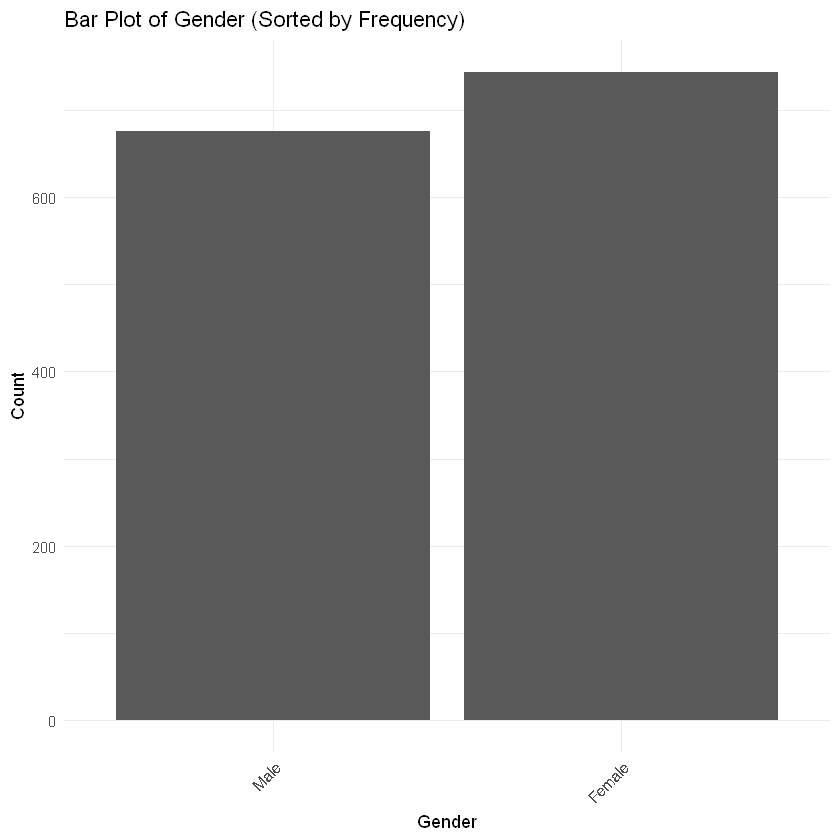

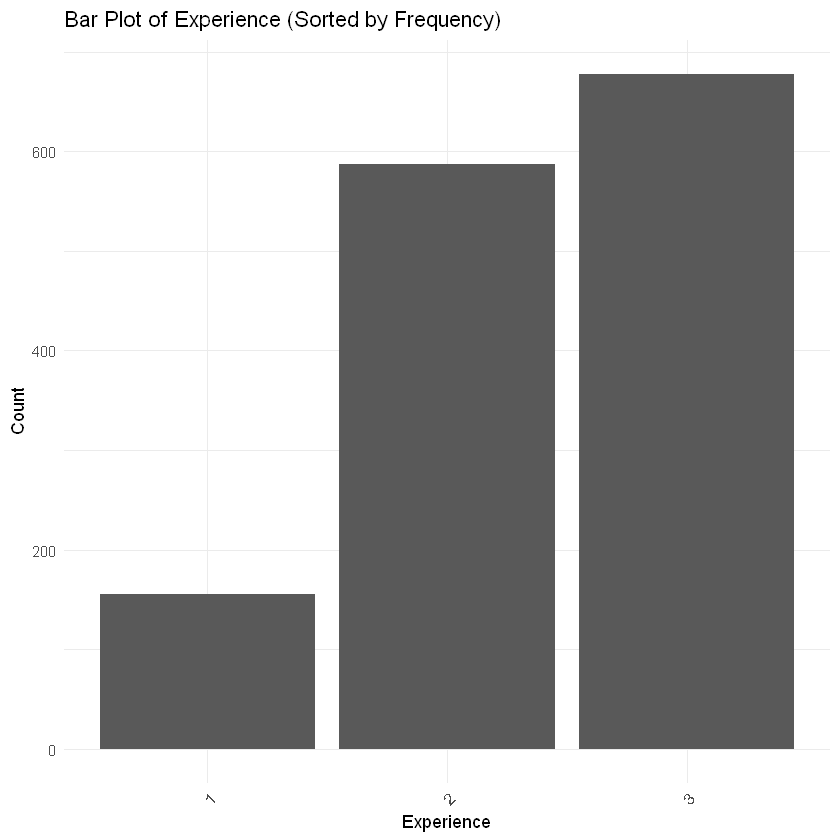

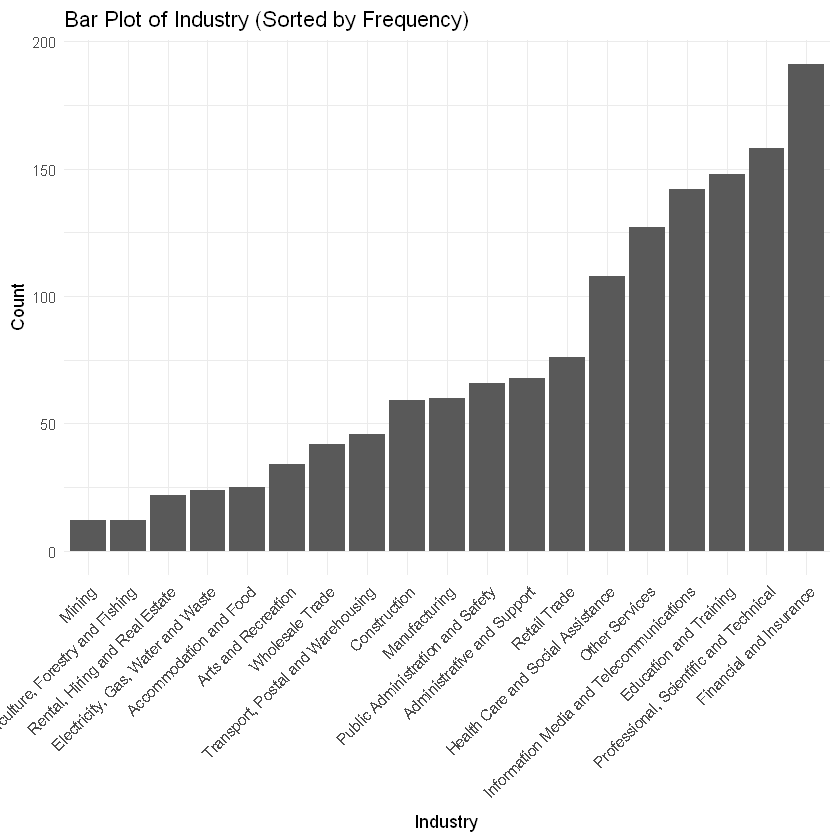

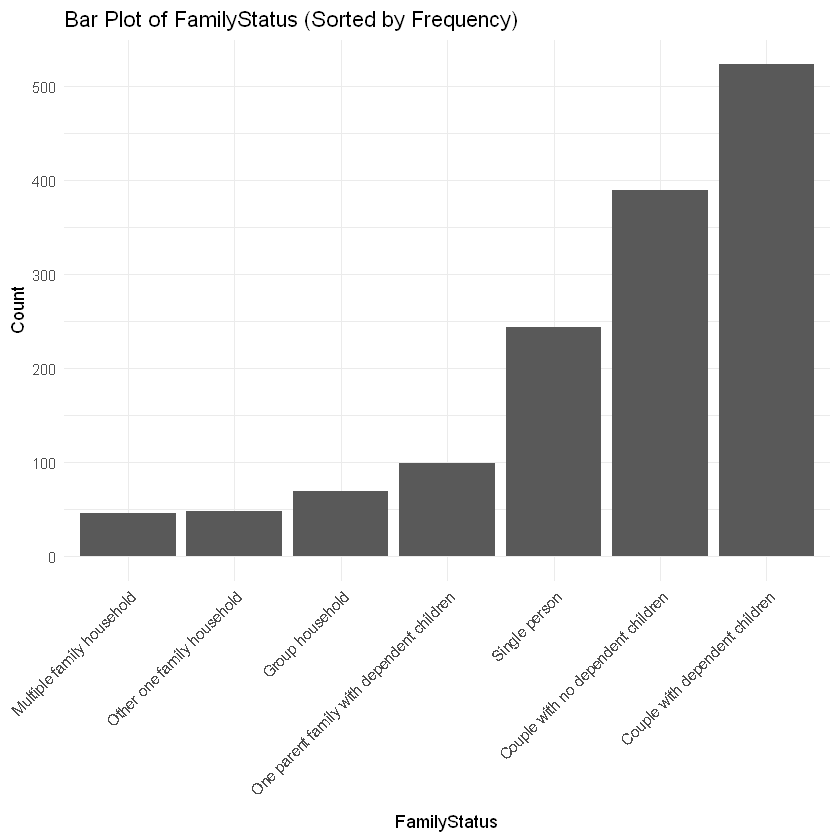

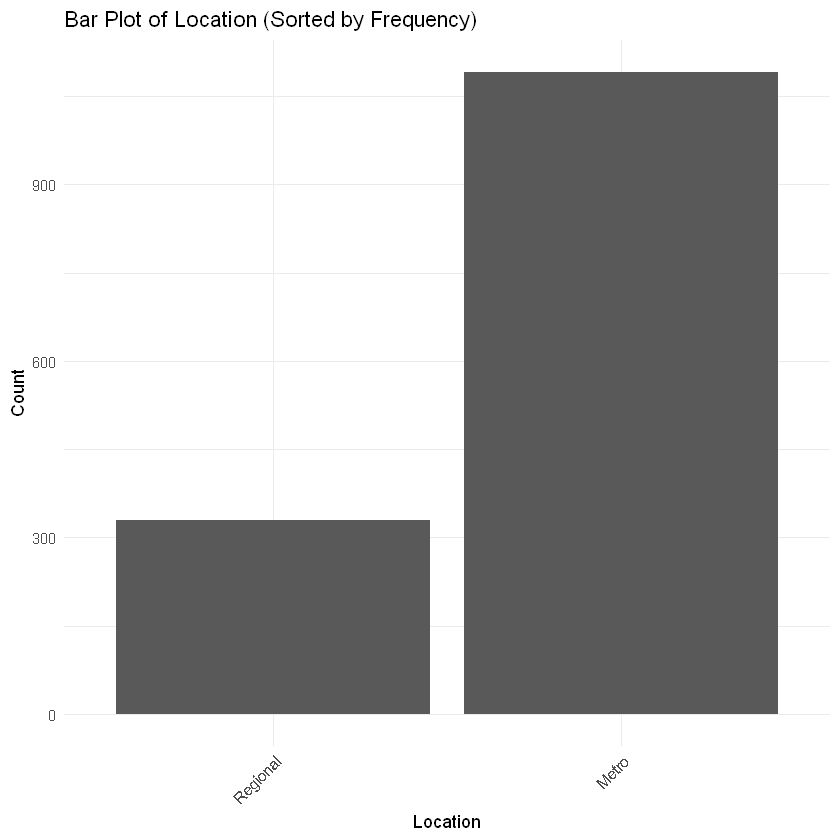

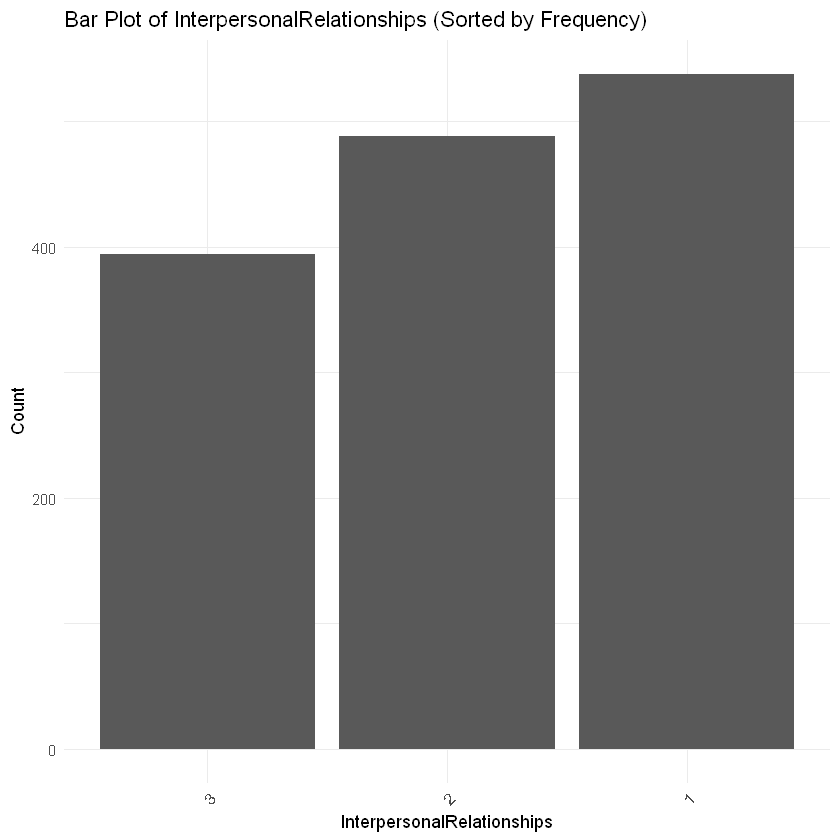

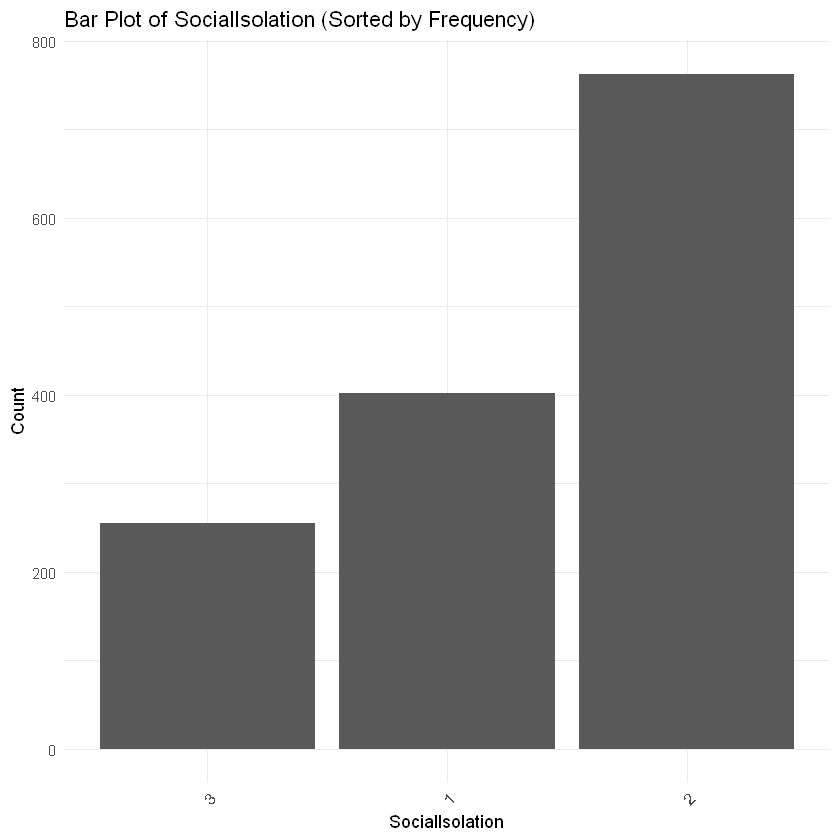

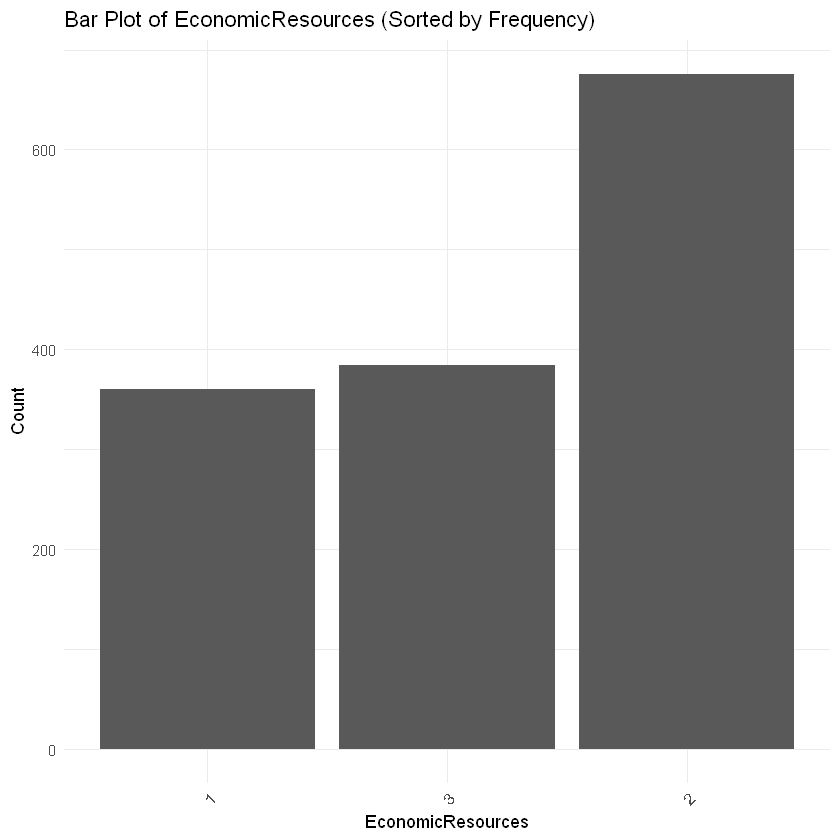

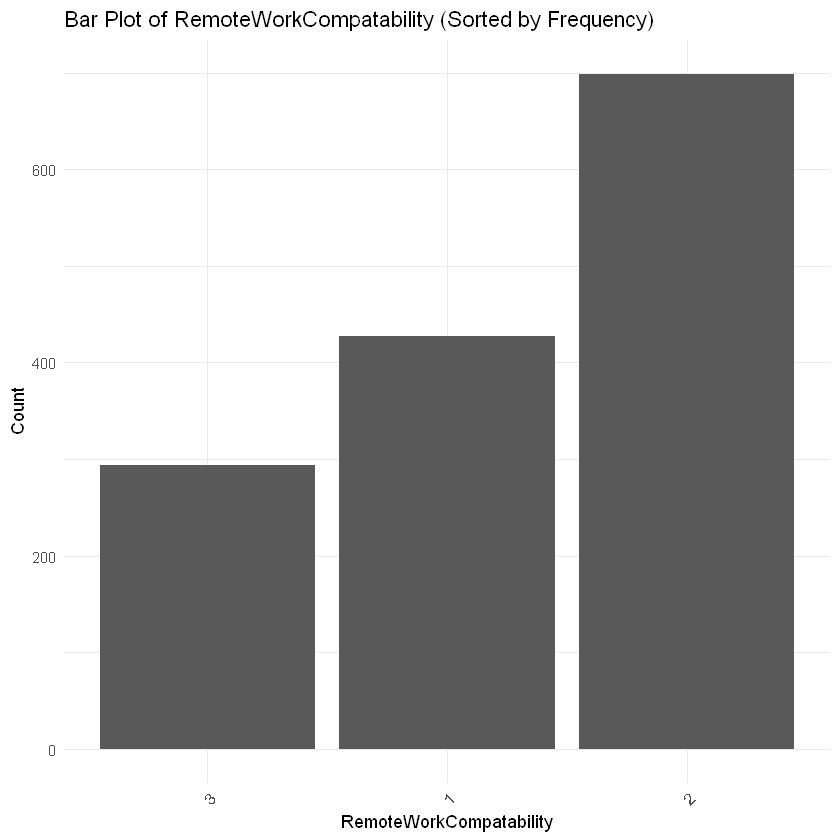

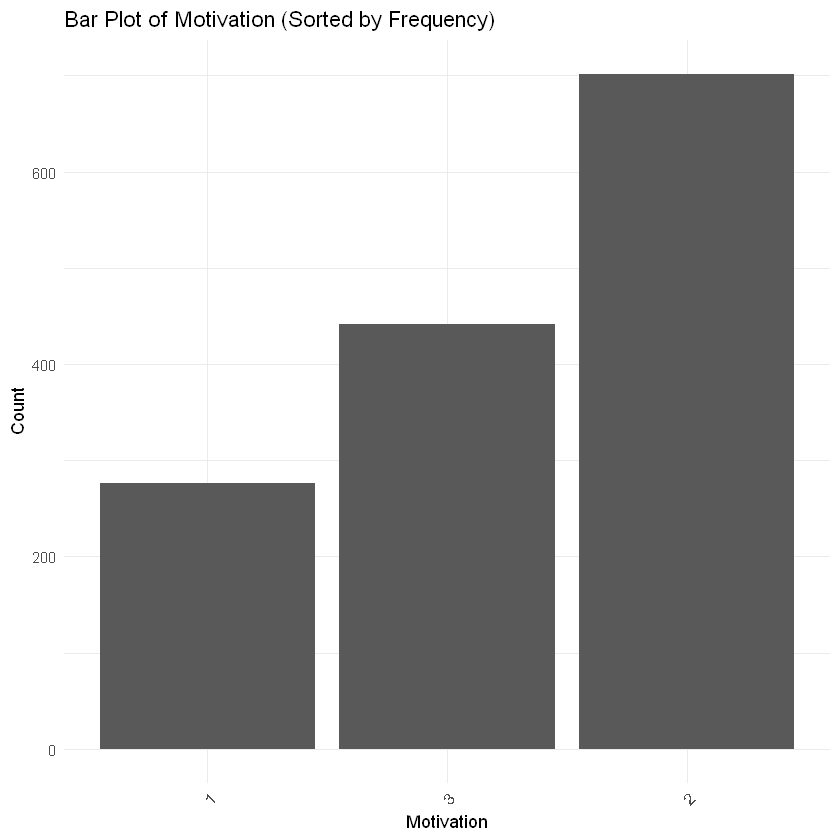

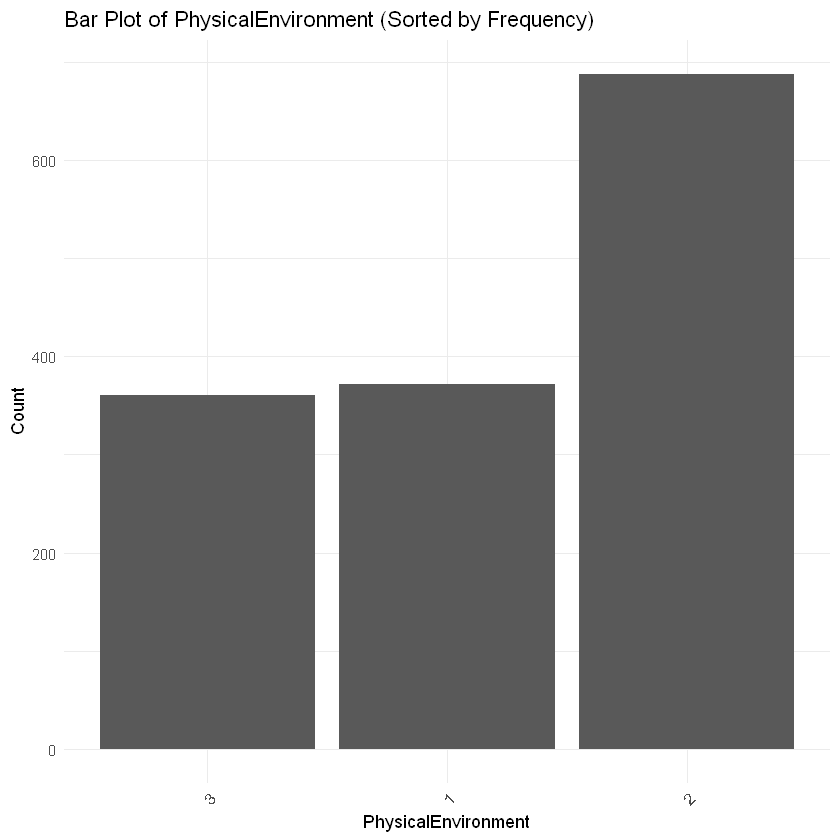

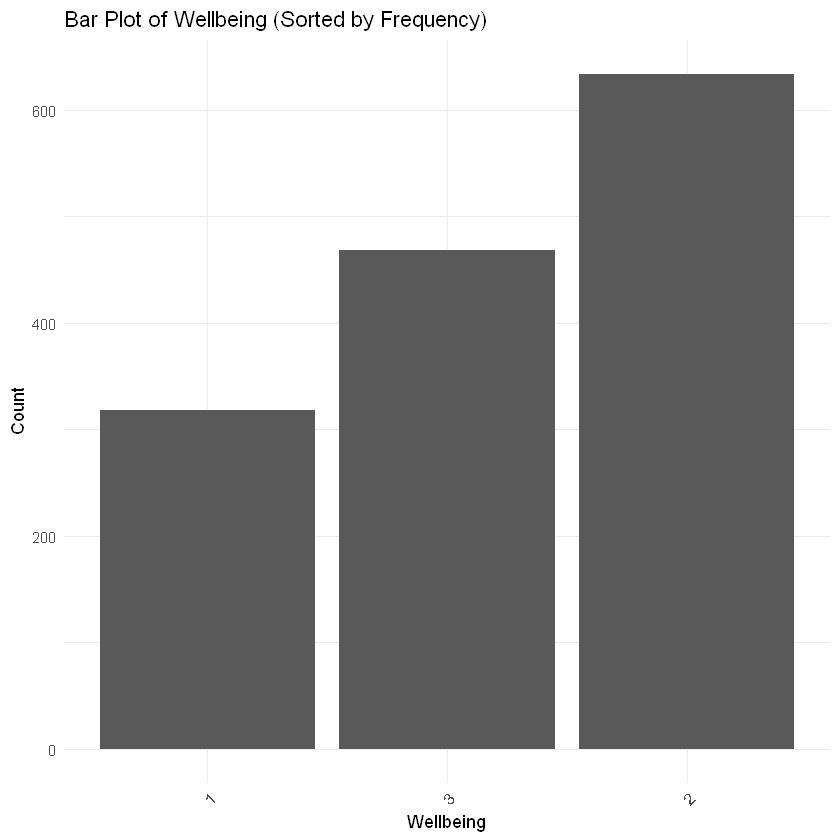

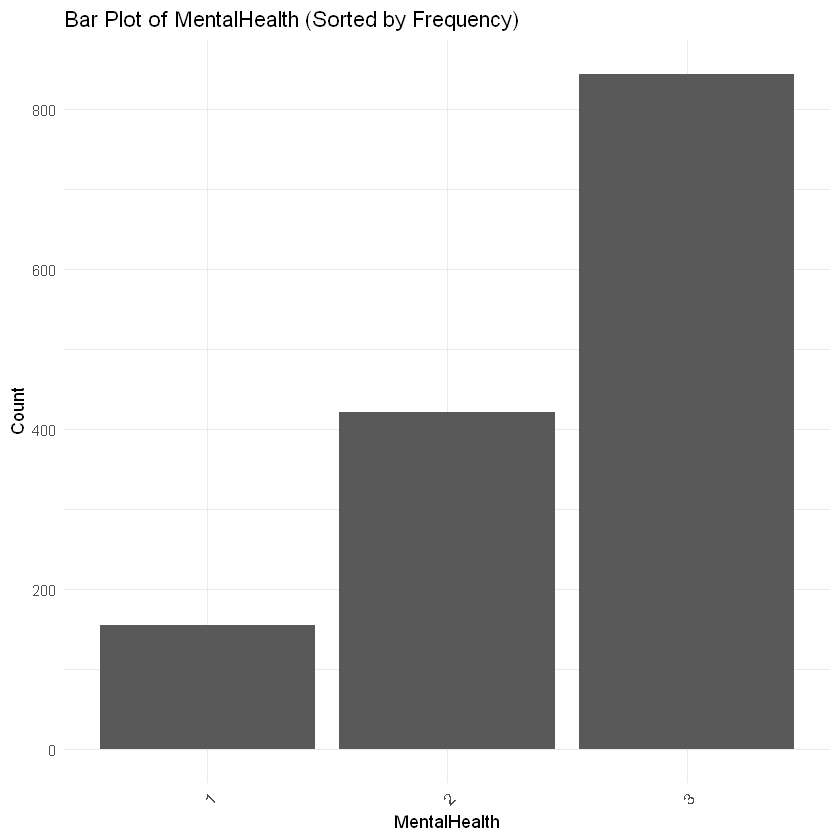

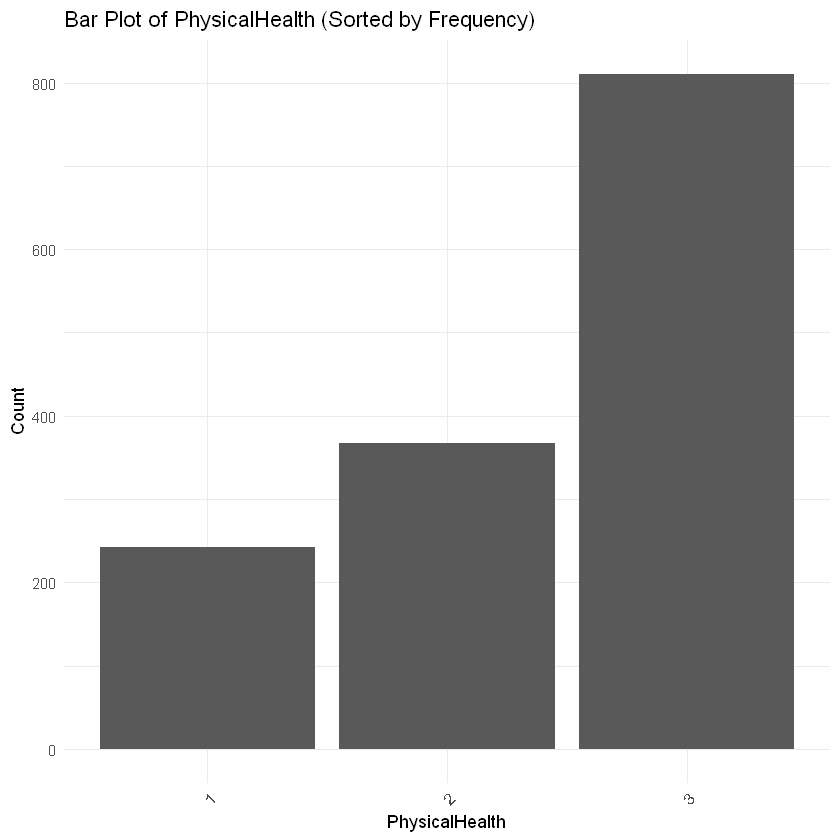

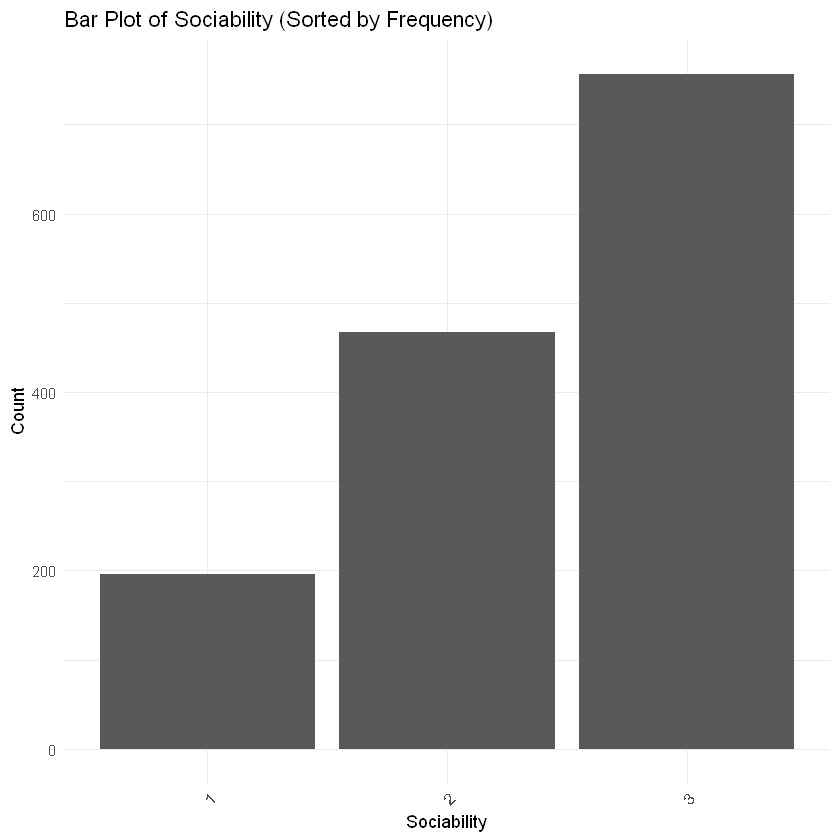

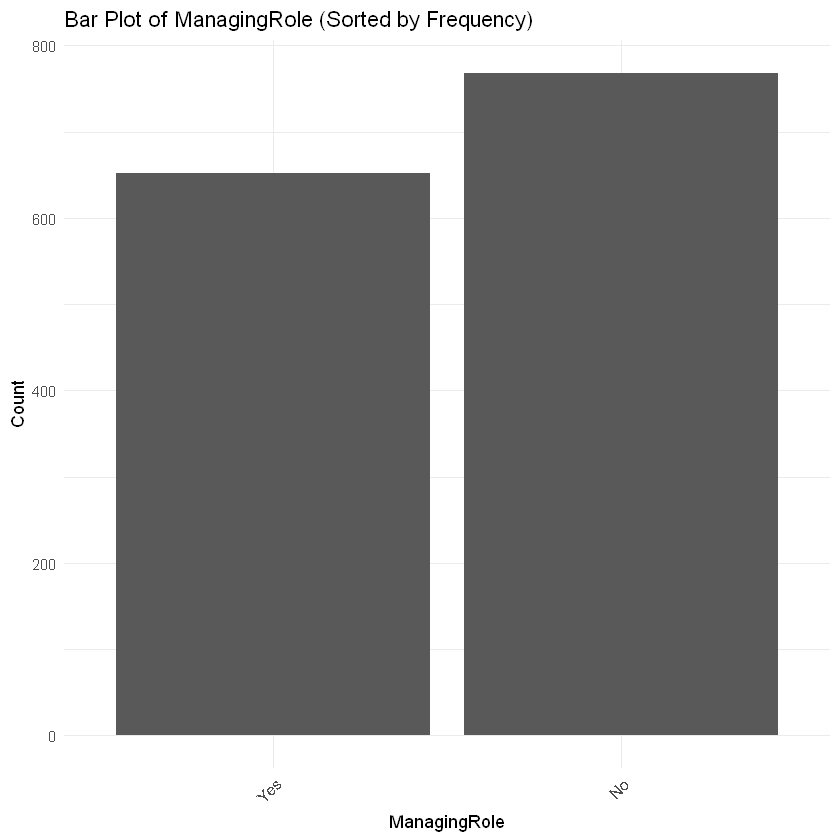

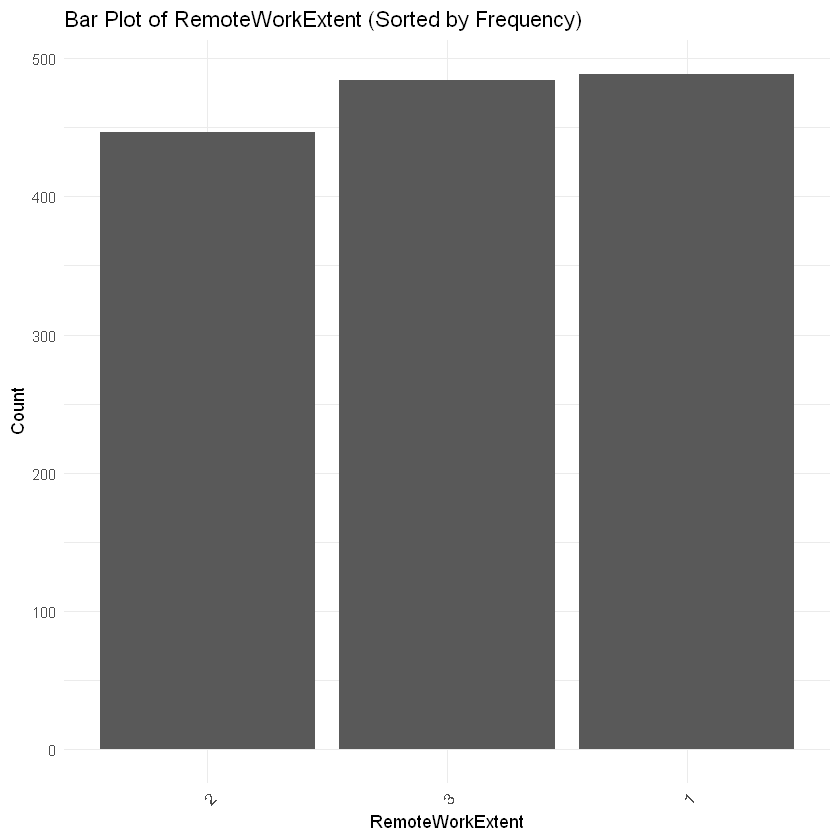

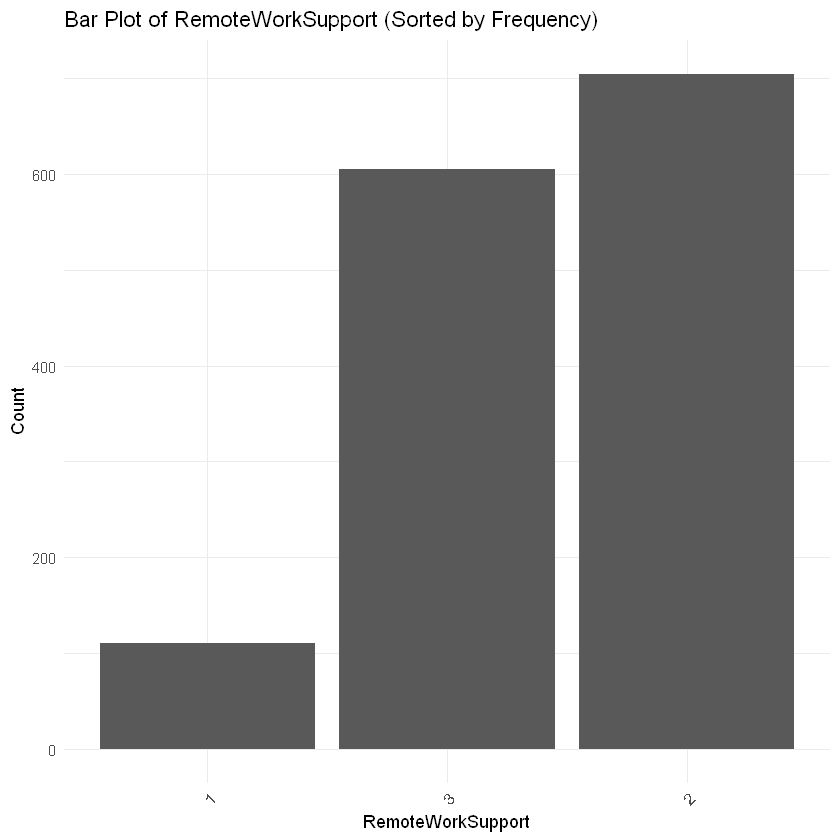

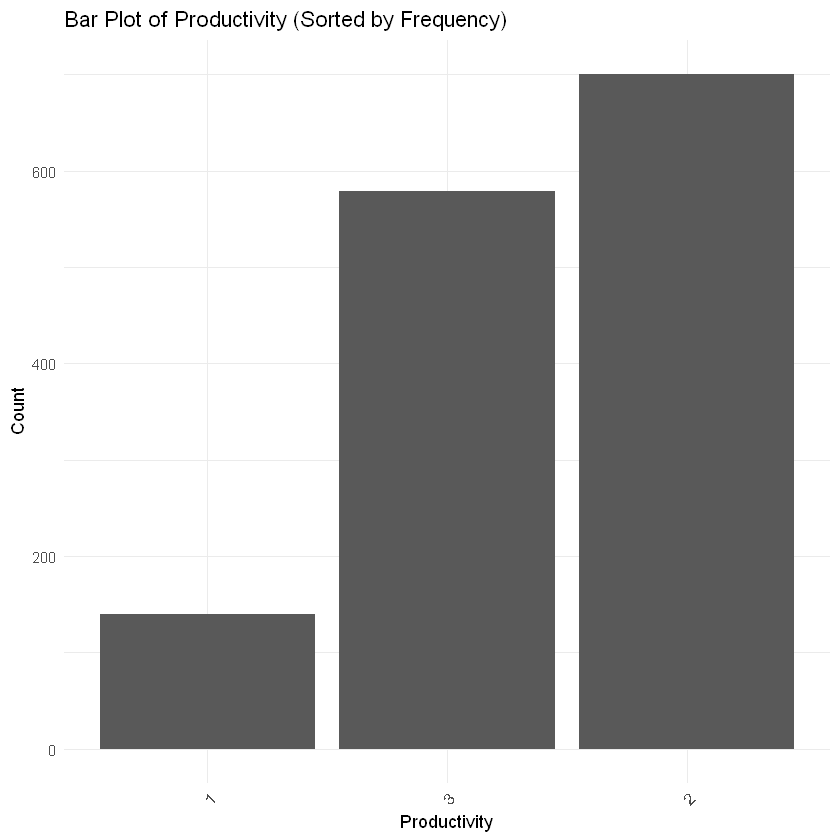

In [5]:
for (col in categorical_columns) {
  plot <- ggplot(data, aes(x = fct_rev(fct_infreq(get(col))))) +
    geom_bar() +
    ggtitle(paste("Bar Plot of", col, "(Sorted by Frequency)")) +
    xlab(col) +
    ylab("Count") +
    theme_minimal() +
    theme(axis.text.x = element_text(angle = 45, hjust = 1))
  print(plot)
}

Warning message:
"`aes_string()` was deprecated in ggplot2 3.0.0.
ℹ Please use tidy evaluation idioms with `aes()`.
ℹ See also `vignette("ggplot2-in-packages")` for more information."


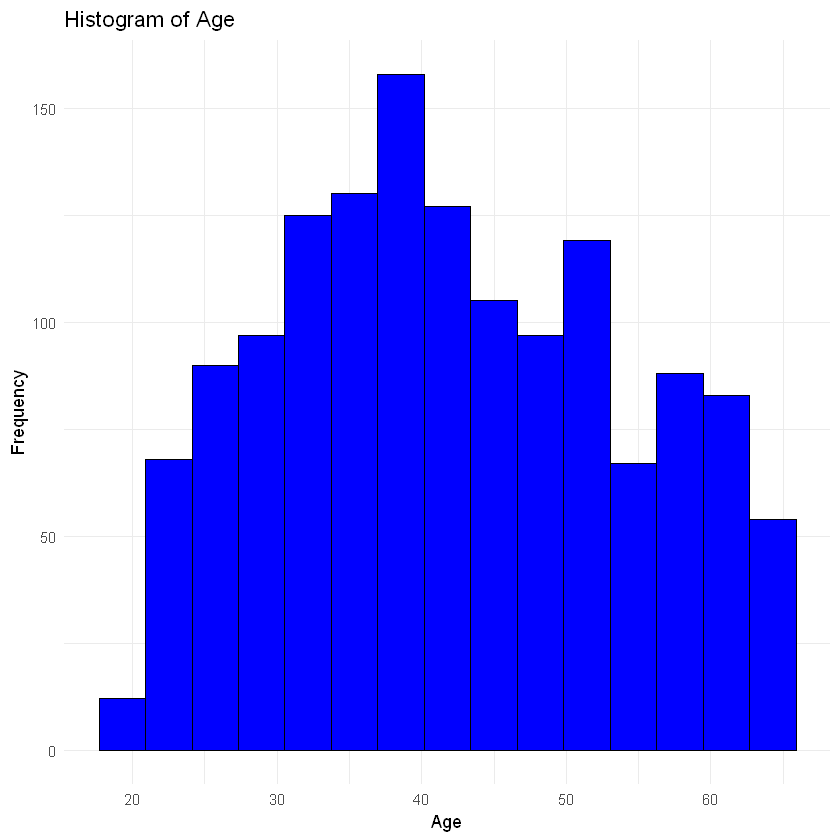

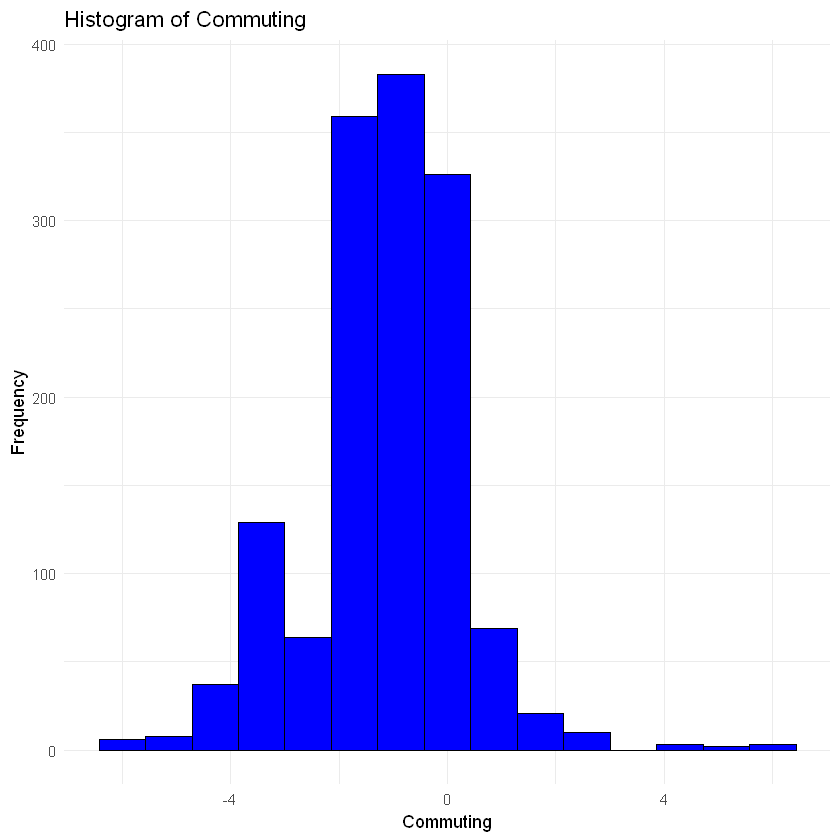

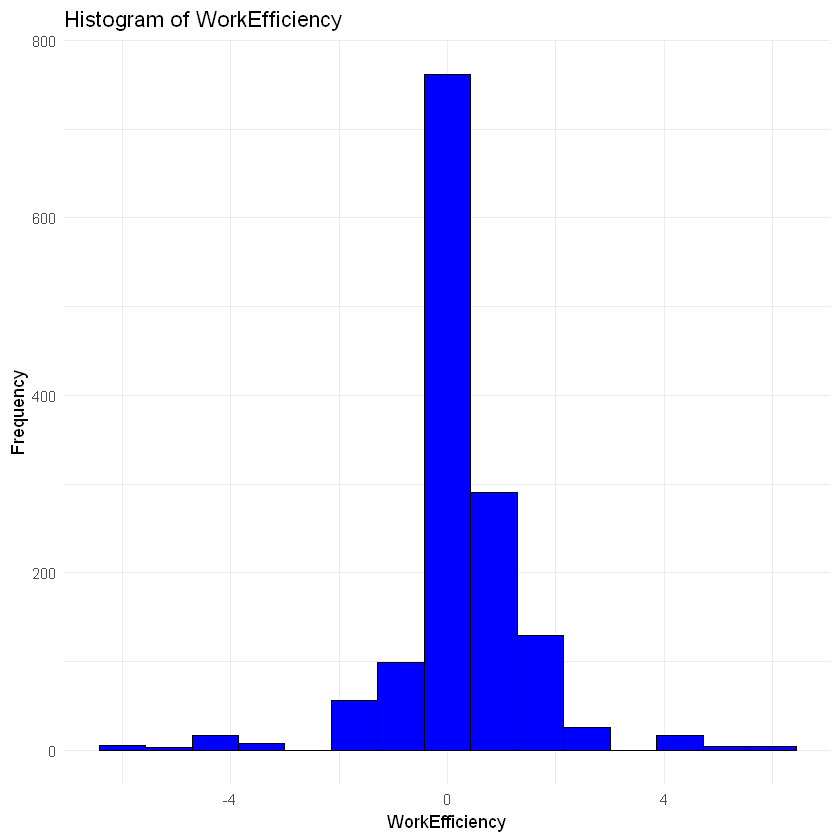

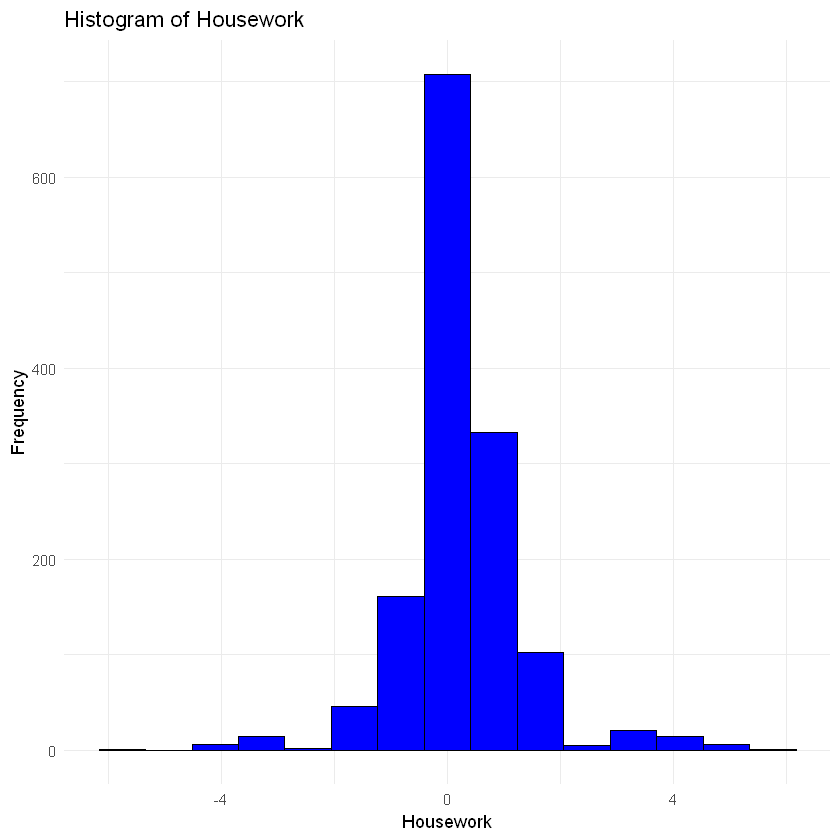

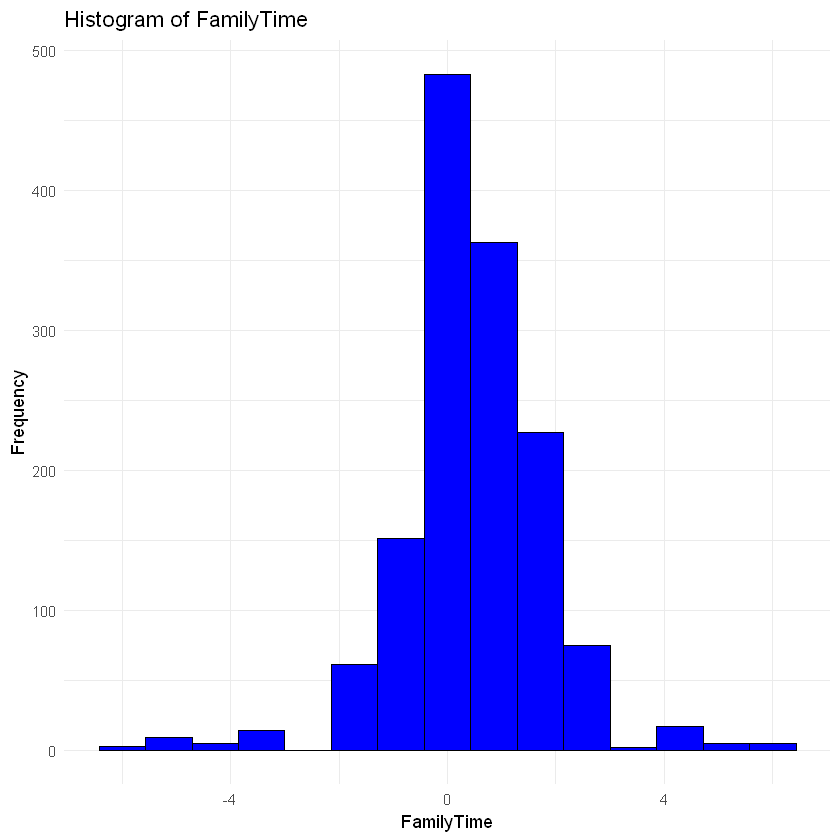

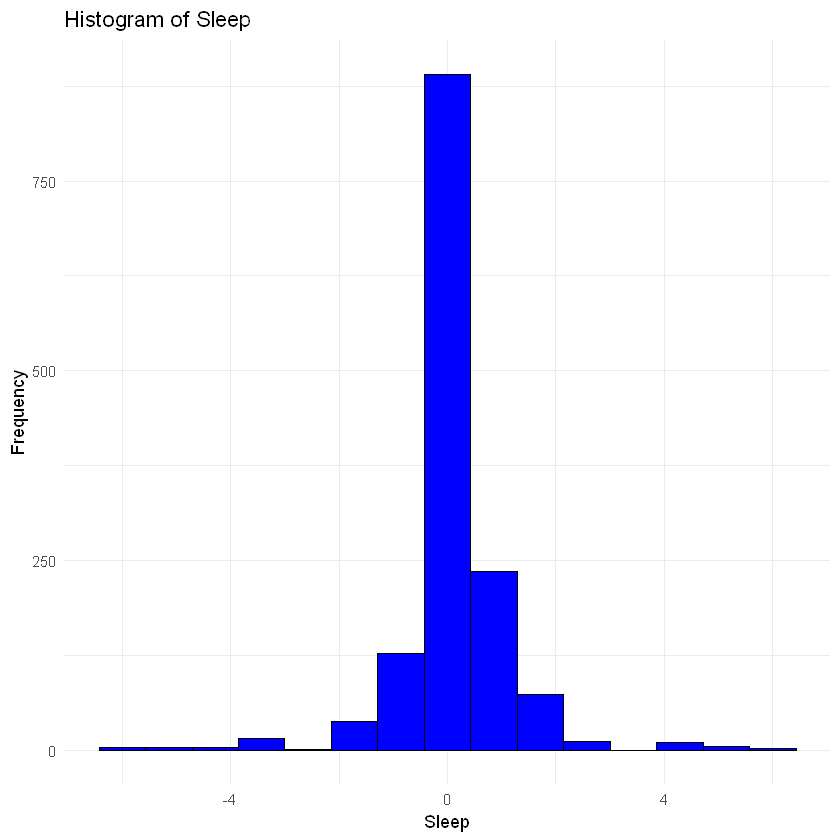

In [6]:
for (col in numeric_columns) {
  plot <- ggplot(data, aes_string(x = col)) +
    geom_histogram(bins = 15, fill = "blue", color = "black") +
    ggtitle(paste("Histogram of", col)) +
    xlab(col) +
    ylab("Frequency") +
    theme_minimal()
  print(plot)
}

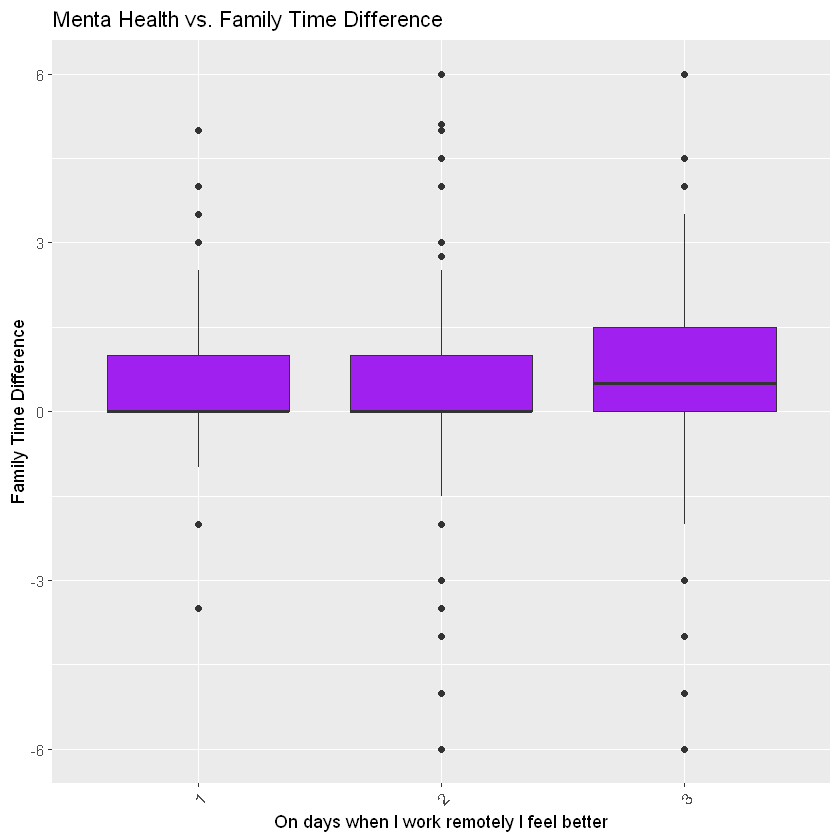

In [7]:
ggplot(data, aes(x = MentalHealth, y = FamilyTime)) +
  geom_boxplot(fill = "purple") +
  labs(
    title = "Menta Health vs. Family Time Difference",
    x = "On days when I work remotely I feel better",
    y = "Family Time Difference"
  ) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

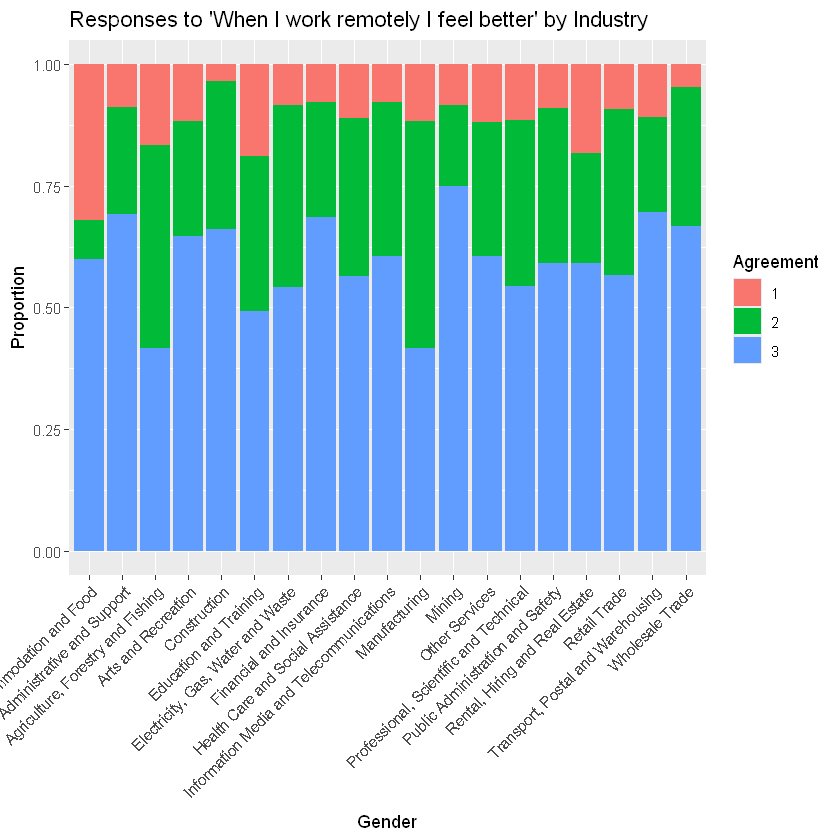

In [8]:
ggplot(data, aes(x = Industry, fill = MentalHealth)) +
  geom_bar(position = "fill") +
  labs(
    title = "Responses to 'When I work remotely I feel better' by Industry",
    x = "Gender",
    y = "Proportion",
    fill = "Agreement"
  ) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))